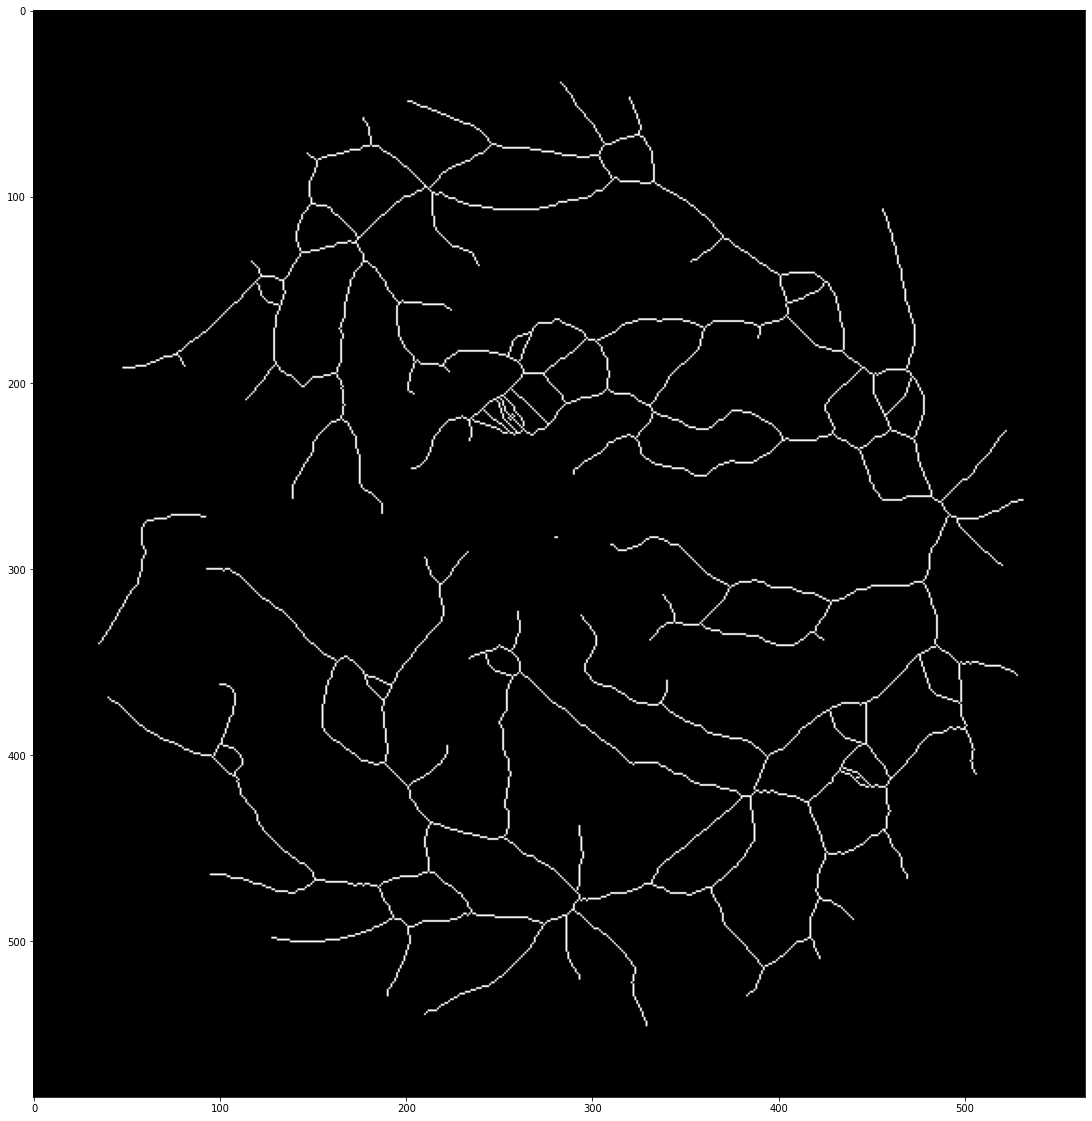

In [12]:
from skimage import io, img_as_bool, segmentation
from skimage.morphology import skeletonize, binary_closing
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import cv2

# image = cv2.imread('image/skeleton/24_bloodvessel.png')
image = io.imread('image/lastresult/24_bloodvessel.png')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = img_as_bool(image)
out = ndi.distance_transform_edt(~image)
out = out < 0.05 * out.max()
out = skeletonize(out)
out = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
# out = morphology.binary_dilation(out, morphology.selem.disk(0.25))
# out = segmentation.clear_border(out)
# out = out | image

plt.figure(figsize=(20,20))
plt.imshow(out, cmap='gray')
# plt.imsave('image/filled/24_bloodvessel.png', out, cmap='gray')
plt.show()

In [2]:
import cv2
import numpy as np

image = cv2.imread('image/skeleton/24_bloodvessel.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply dilation on src image
kernel = np.ones((3,3),np.uint8)
dilated_img = cv2.dilate(gray, kernel, iterations = 3)

cv2.imshow("filled gaps for contour detection", dilated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()